In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sn
import statsmodels.formula.api as snf

import ipywidgets as widgets
from ipywidgets import interact, fixed

In [2]:
url = 'https://raw.githubusercontent.com/PaulaEsteban2000/CSE151A_UrbanAnimals/main/preprocessed_df.csv'
df = pd.read_csv(url)
df.head(2)


,Unnamed: 0,lat,long,BIRD,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,...,POOR,SUMMER,SPRING,FALL,WINTER,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
0,0,30.494640,-91.15616,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
1,1,30.431417,-91.14107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df[['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED']]
x = df.drop(['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'], axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

logistic_model = MultiOutputClassifier(LogisticRegression())
logistic_model.fit(xtrain, ytrain)
logistic_predictions = logistic_model.predict(xtest)

accuracy = accuracy_score(ytest, logistic_predictions)
matrix = confusion_matrix(ytest.values.flatten(), logistic_predictions.flatten())
report = classification_report(ytest.values.flatten(), logistic_predictions.flatten())

print("Accuracy:" , accuracy)
print("Confusion Matrix:",matrix)
print("Classification Report:", report)

Accuracy: 0.2721107266435986
Confusion Matrix: [[27999   901]
 [ 5259  1966]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.97      0.90     28900
           1       0.69      0.27      0.39      7225

    accuracy                           0.83     36125
   macro avg       0.76      0.62      0.65     36125
weighted avg       0.81      0.83      0.80     36125



In [10]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [13]:
def build_model():
    model = Sequential([
        Dense(12, activation='sigmoid', input_dim=xtrain.shape[1]),
        Dense(12, activation='sigmoid'),
        Dense(12, activation='sigmoid'),
        Dense(12, activation='sigmoid'),
        Dense(12, activation='sigmoid'),
        Dense(ytrain.shape[1], activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=0.3)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model

Epoch 1/100
904/904 [==============================] - 4s 3ms/step - loss: 0.1331 - mse: 0.1331 - val_loss: 0.1306 - val_mse: 0.1306
Epoch 2/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1301 - mse: 0.1301 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 3/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 4/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 5/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 6/100
904/904 [==============================] - 2s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 7/100
904/904 [==============================] - 3s 3ms/step - loss: 0.1299 - mse: 0.1299 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 8/100
904/904 [==============================] - 2s 2ms/step - 

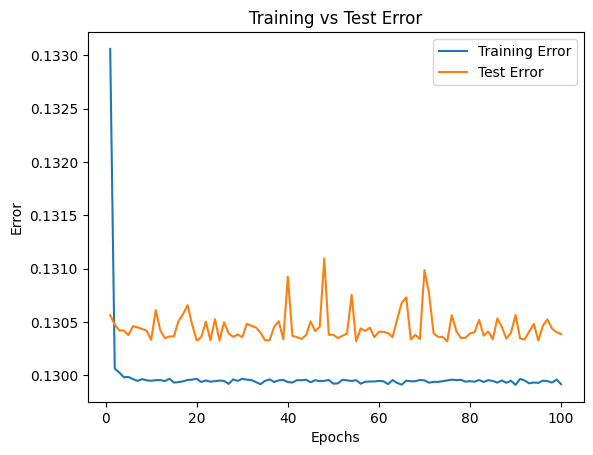

In [19]:
model = build_model()
history = model.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest), verbose=1)

train_losses = history.history['loss']
test_losses = history.history['val_loss']

model.fit(xtrain, ytrain, epochs=100)


epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Error')
plt.plot(epochs, test_losses, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training vs Test Error')
plt.legend()
plt.show()